# PCBの特性インピーダンス計算

Conductor 1 charge density range: -1.3060270673769533e-12 -5.836516905202987e-16
Conductor 1 total charge: -4.616008031495927e-17
Conductor 2 charge density range: 5.226746106196117e-13 3.5410651871502557e-12
Conductor 2 total charge: 3.1879005042922868e-16
Conductor 3 charge density range: -1.3060270673769601e-12 -5.836516905191433e-16
Conductor 3 total charge: -4.627064507426417e-17


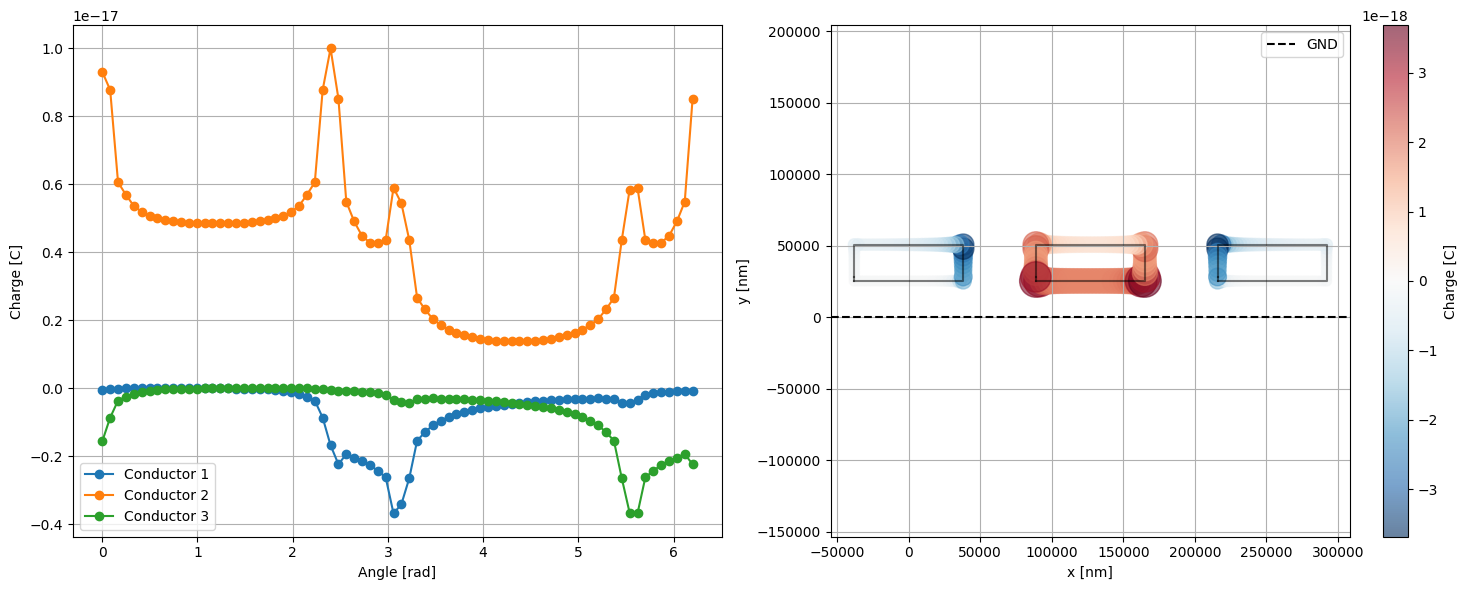

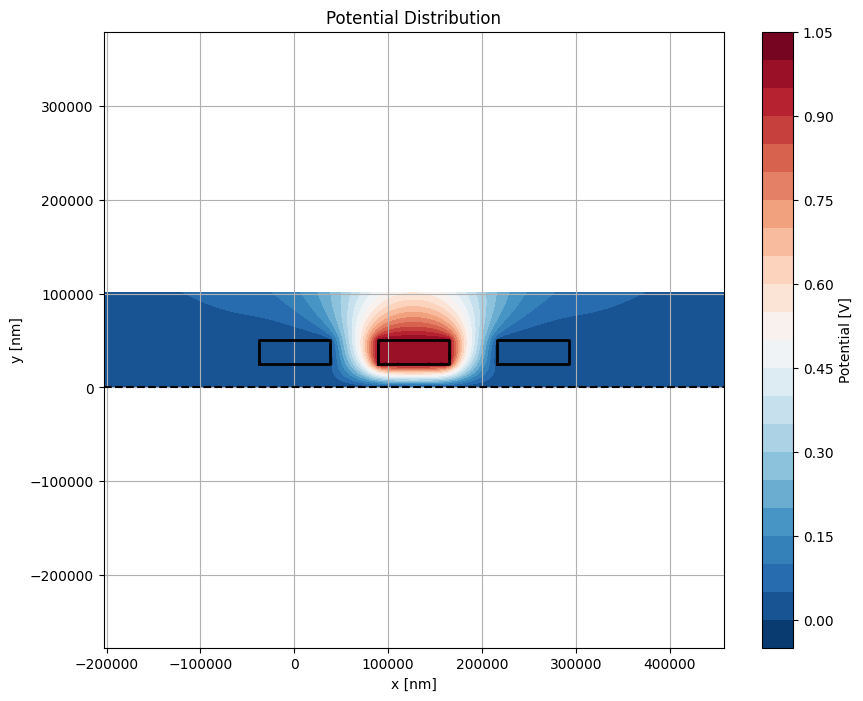

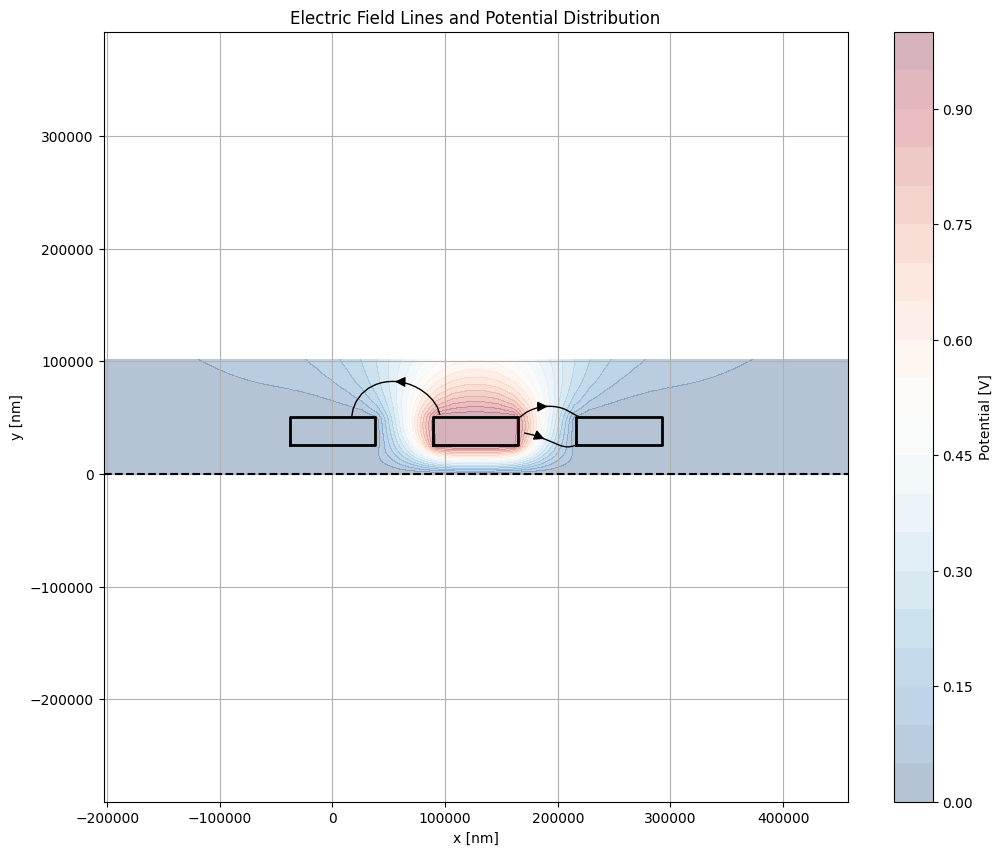


 C Matrix [F/m]:
[[1.18694273e-10]]

 L Matrix [H/m]:
[[1.87477699e-07]]

 Z Matrix [H/m]:
[[39.74293397]]
Conductor 1 charge density range: -1.2363675272993936e-12 -4.632031863528515e-16
Conductor 1 total charge: -4.1579546796364253e-17
Conductor 2 charge density range: 6.74740046550938e-13 4.135702642586682e-12
Conductor 2 total charge: 3.64094333197653e-16
Conductor 3 charge density range: -4.1357026425866625e-12 -6.747400465509494e-13
Conductor 3 total charge: -3.642079132885688e-16
Conductor 4 charge density range: 4.632031863519932e-16 1.2363675272993817e-12
Conductor 4 total charge: 4.168322729882891e-17


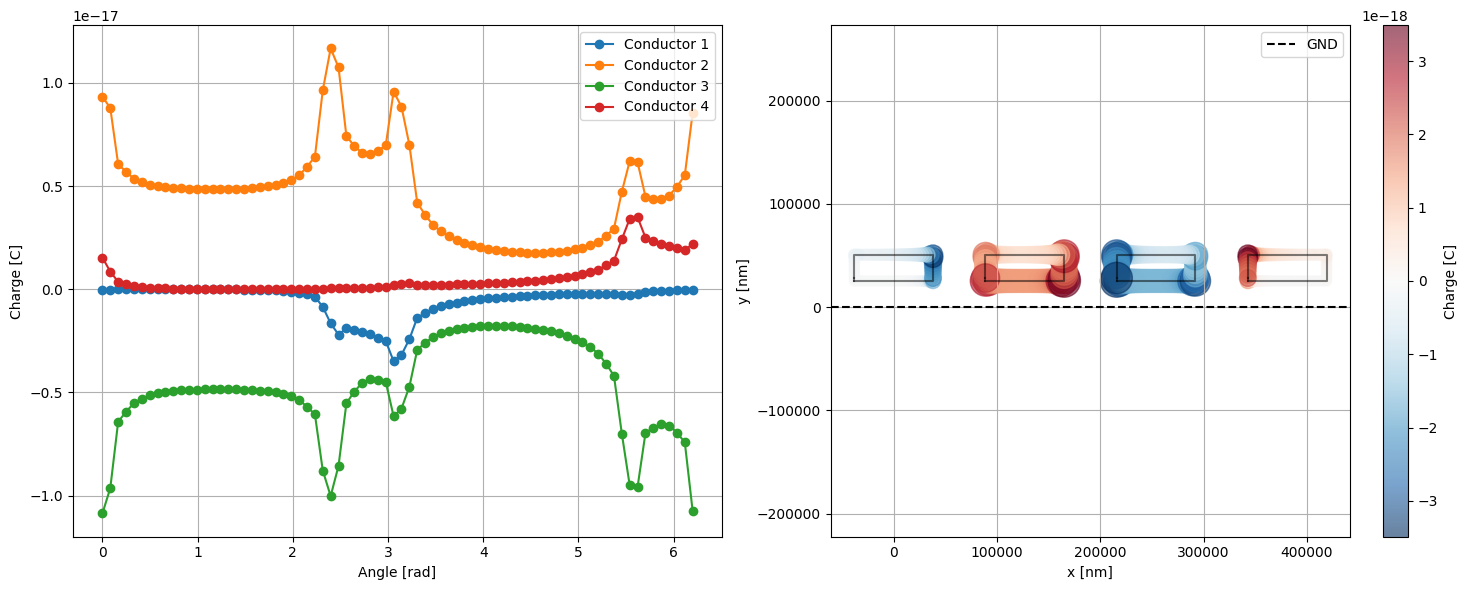

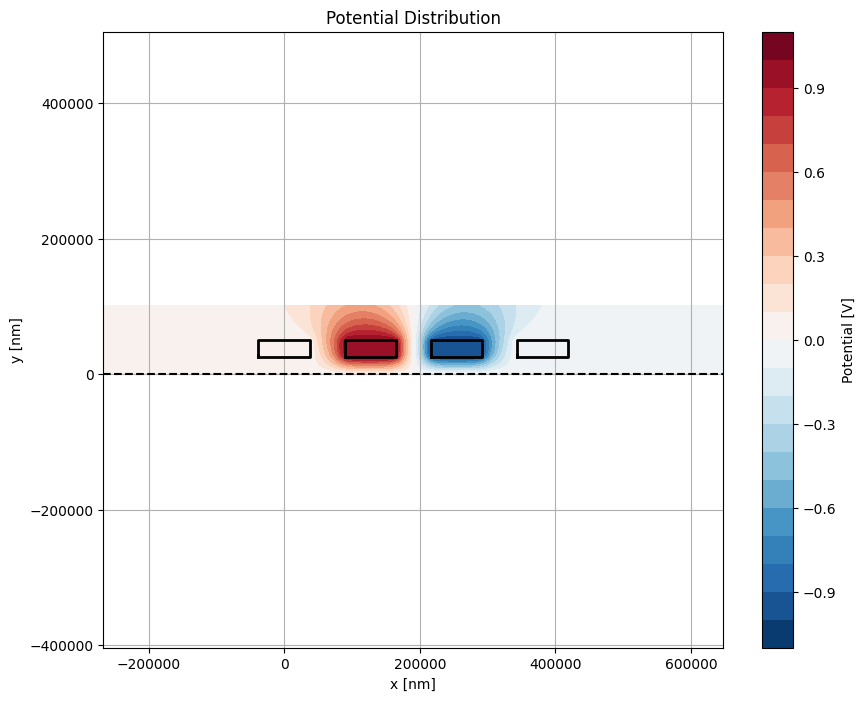

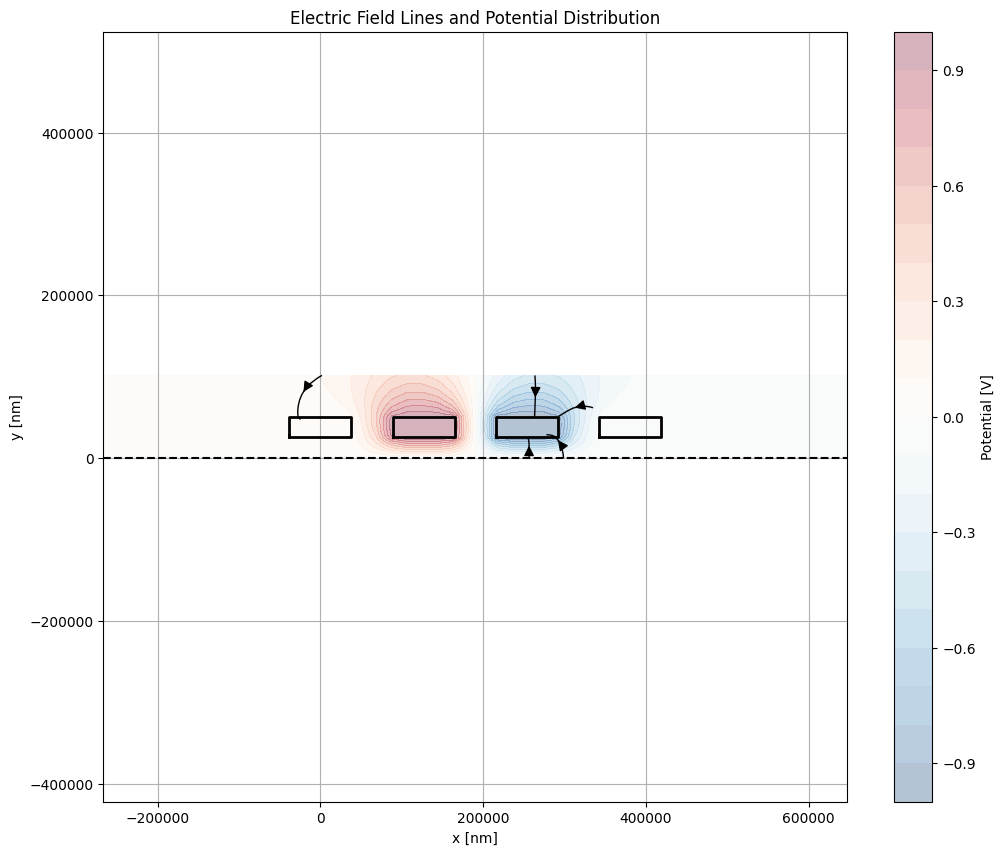


 C Matrix [F/m]:
[[ 1.18731623e-10 -1.66221543e-11]
 [-1.66221543e-11  1.18731623e-10]]

 L Matrix [H/m]:
[[1.91165441e-07 2.67627222e-08]
 [2.67627222e-08 1.91165441e-07]]

 Z Matrix [H/m]:
[[40.9198913  21.44347394]
 [21.44347394 40.9198913 ]]
Conductor 1 charge density range: -1.688831277321247e-13 -1.680548001728166e-17
Conductor 1 total charge: -4.896595180558121e-18
Conductor 2 charge density range: 1.3419785665540985e-12 2.9407570682826197e-12
Conductor 2 total charge: 2.6014730411981734e-16
Conductor 3 charge density range: -1.6888312773212609e-13 -1.6805480017240188e-17
Conductor 3 total charge: -4.896595180558118e-18


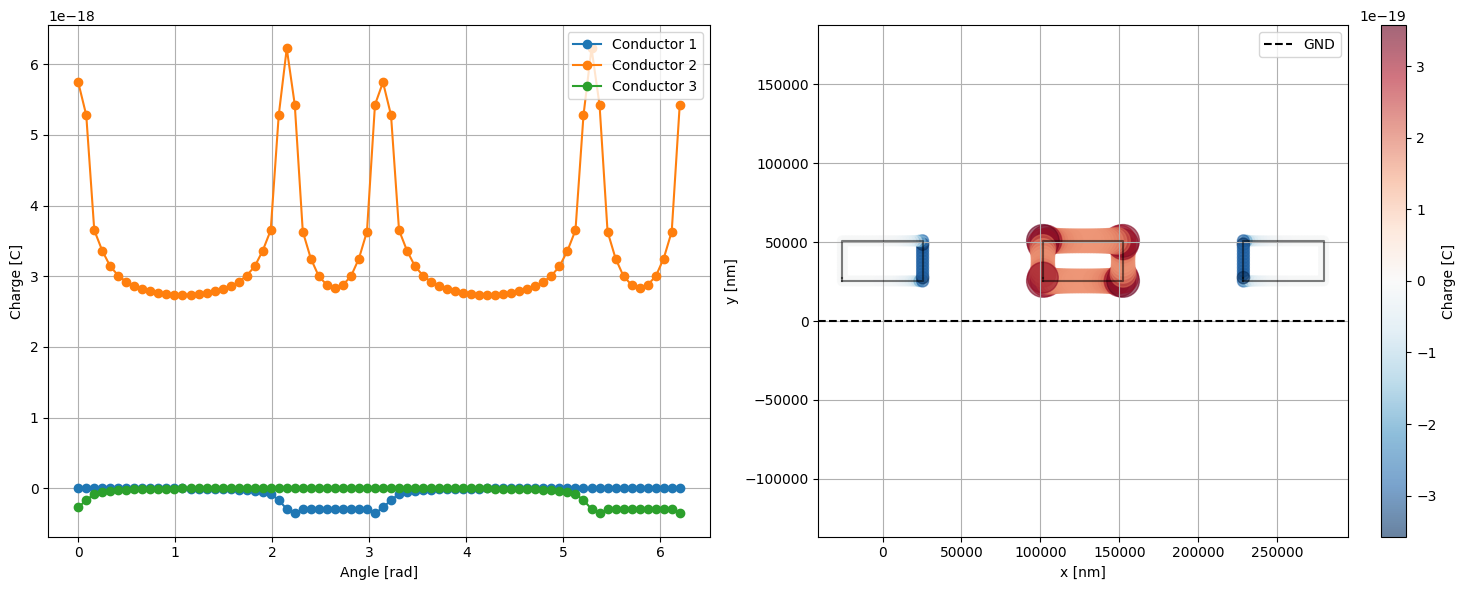

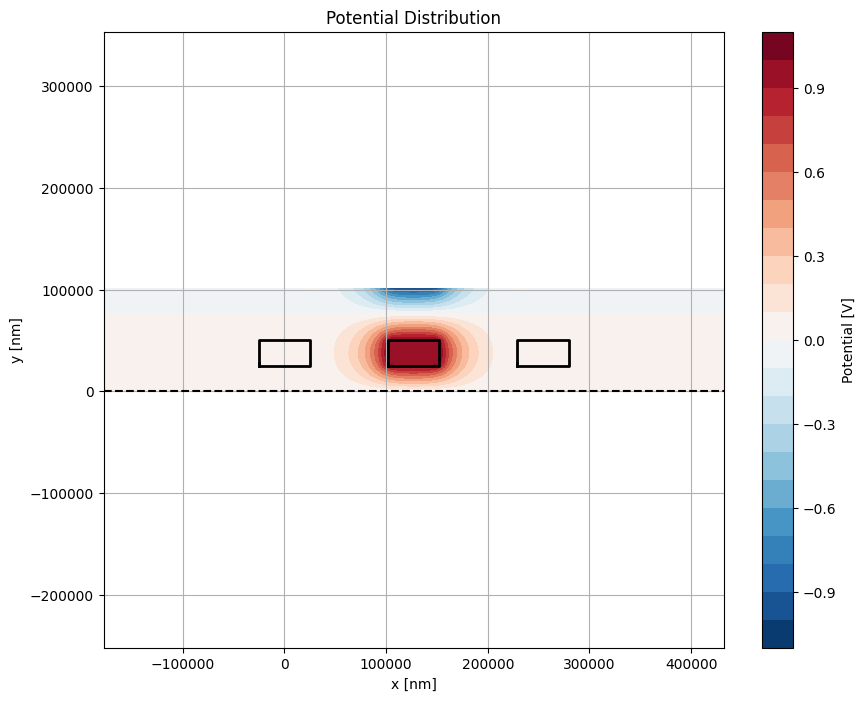

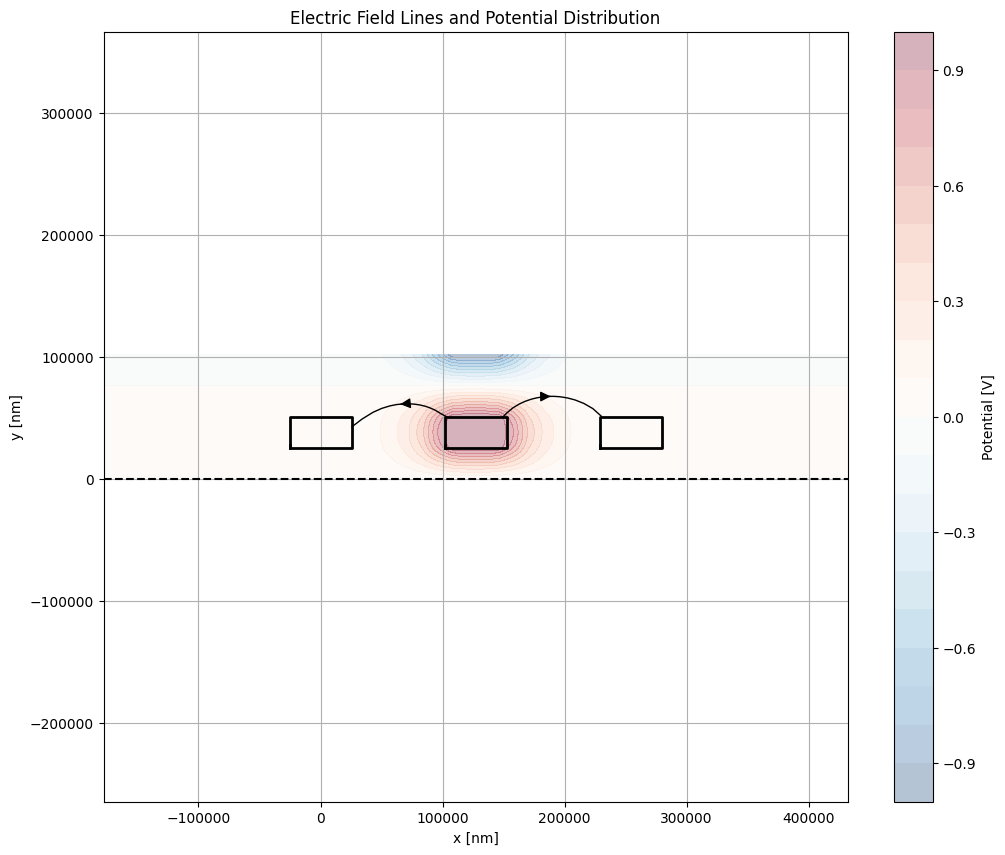


 C Matrix [F/m]:
[[1.2956842e-10]]

 L Matrix [H/m]:
[[1.71743462e-07]]

 Z Matrix [H/m]:
[[36.40747212]]
Conductor 1 charge density range: -6.222843276163517e-13 -3.504708685113736e-18
Conductor 1 total charge: -1.8695619461632585e-17
Conductor 2 charge density range: 1.84067911656516e-12 3.6144940796680712e-12
Conductor 2 total charge: 4.441563208038912e-16
Conductor 3 charge density range: -6.222843276155106e-13 -3.4411573250461185e-18
Conductor 3 total charge: -1.869561725238172e-17
Conductor 4 charge density range: -6.863508968181684e-19 -4.199665476477144e-24
Conductor 4 total charge: -2.0618680423033347e-23


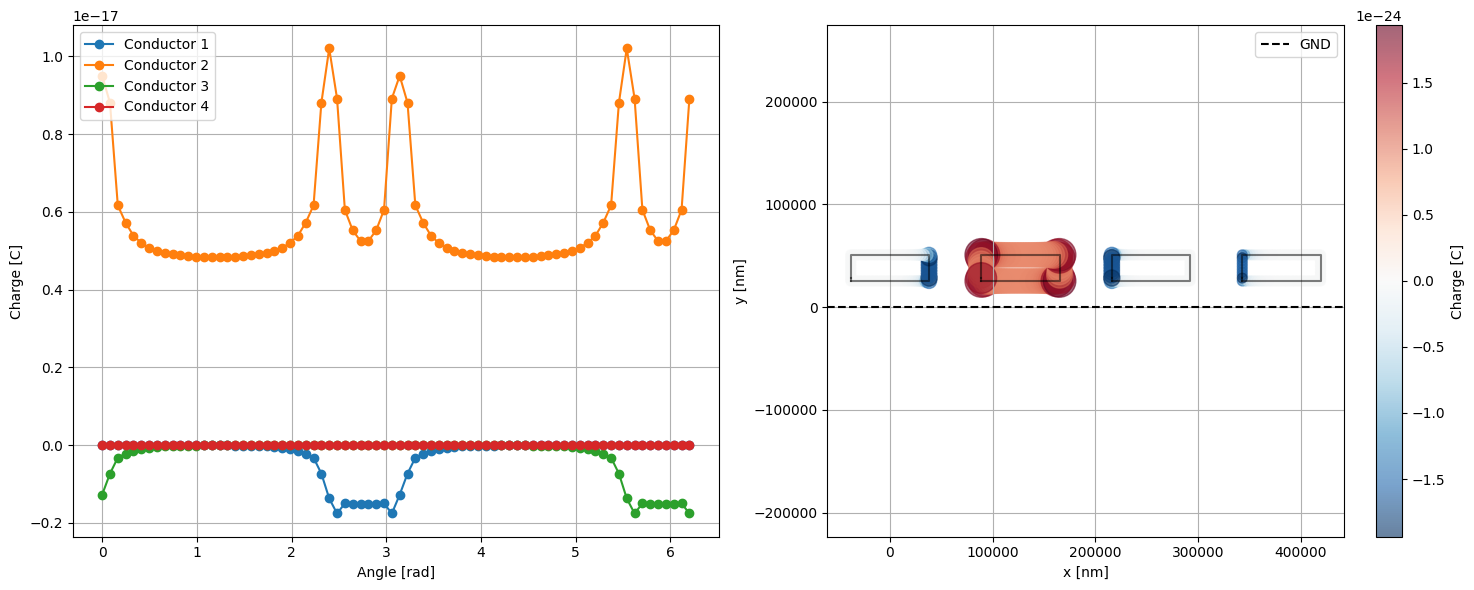

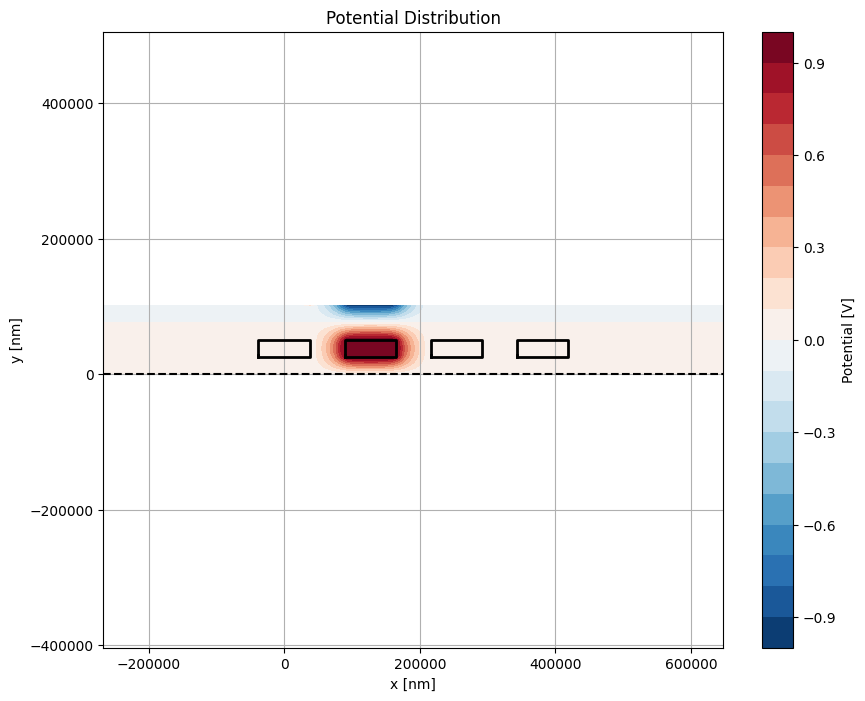

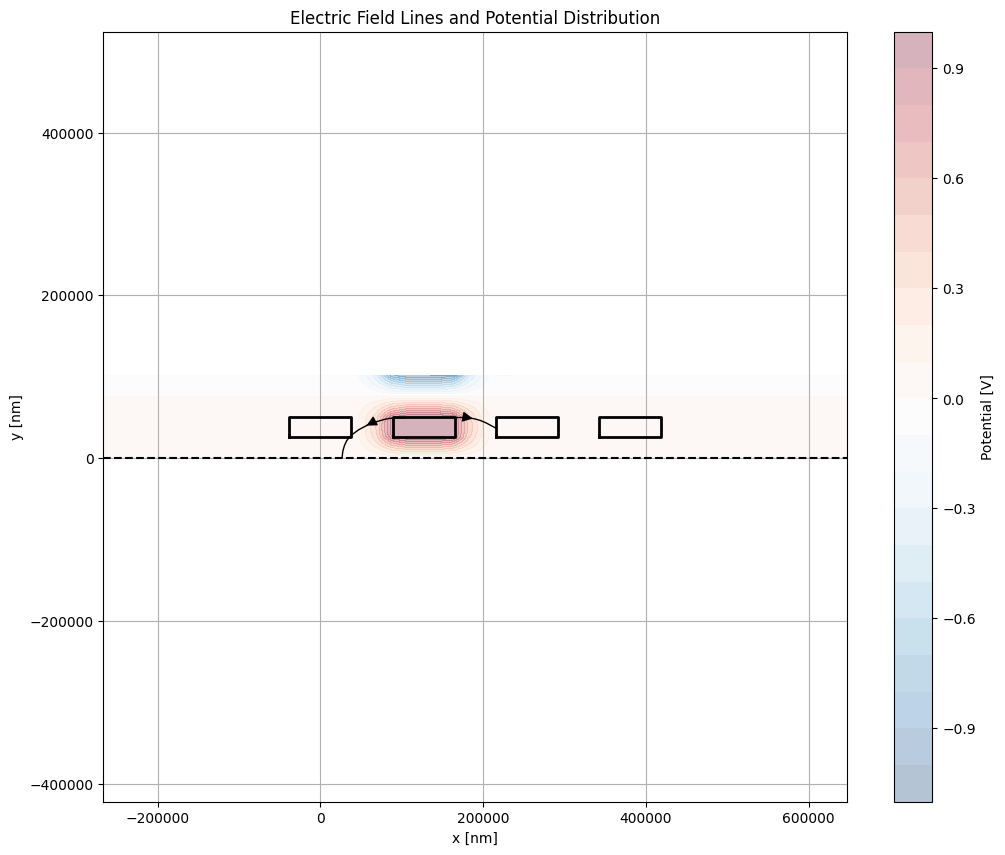


 C Matrix [F/m]:
[[ 1.65798341e-10 -6.74957184e-12]
 [-6.74957184e-12  1.65798341e-10]]

 L Matrix [H/m]:
[[1.34437223e-07 5.47287561e-09]
 [5.47287561e-09 1.34437223e-07]]

 Z Matrix [H/m]:
[[28.52262017  8.13191565]
 [ 8.13191565 28.52262017]]


In [18]:
import sys
import os
# multiconcalc.pyが存在するディレクトリをパスに追加
sys.path.append(os.path.abspath('..'))

import importlib

# クラスを更新した場合更新を反映させるため再読み込み
import multi_conductor_calculator
importlib.reload(multi_conductor_calculator)
from multi_conductor_calculator import MultiConductorCalculator

import multi_conductor_exporter
importlib.reload(multi_conductor_exporter)
from multi_conductor_exporter import MultiConductorExporter

import multi_conductor_visualizer
importlib.reload(multi_conductor_visualizer)
from multi_conductor_visualizer import MultiConductorVisualizer

# PCB Microstrip Line 1導体のテスト
def test_pcb_ms1():
    calculator = MultiConductorCalculator(epsilon_r=2.0)
    
    w = 7.62e-5  # 30mil
    h = 2.54e-5  # 10mil
    n = 80
    bh1 = 2.54e-5  # 10mil
    xo1 = 0
    xo2 = 12.7e-5  # 5mil
    xo3 = 25.4e-5  # 10mil

    # Add rectangular conductor
    calculator.add_rectangular_conductor( width=w, height=h, base_height=bh1, N_points=n, x_offset=xo1  , is_gnd = True)
    calculator.add_rectangular_conductor( width=w, height=h, base_height=bh1, N_points=n, x_offset=xo2  )
    calculator.add_rectangular_conductor( width=w, height=h, base_height=bh1, N_points=n, x_offset=xo3  , is_gnd = True)

    # 電圧設定
    voltages = [1.0]

    charge_density = calculator.solve_charge_density(voltages)

    visualizer = MultiConductorVisualizer(calculator)
    visualizer.plot_chage_distribution(charge_density)
    visualizer.plot_potential(charge_density) 
    visualizer.plot_electric_field_lines(charge_density, n_lines=20)

    # 容量行列
    C = calculator.calculate_capacitance_matrix()
    print("\n C Matrix [F/m]:")
    print(C)

    L = calculator.calculate_inductance_matrix()
    print("\n L Matrix [H/m]:")
    print(L)

    Z = calculator.calculate_z_matrix()
    print("\n Z Matrix [H/m]:")
    print(Z)

    # ピコファラッド単位で出力
    exporter = MultiConductorExporter(calculator)
    exporter.export_capacitance_matrix("./out/test_pcb_ms1_gnd.csv", unit_prefix='p' , length=0.0254 )
 
# PCB Microstrip Line 2導体のテスト
def test_pcb_ms2():
    calculator = MultiConductorCalculator(epsilon_r=2.0)
    
    w = 7.62e-5  # 2mil
    h = 2.54e-5  # 1mil
    n = 80
    bh1 = 2.54e-5  # 1mil
    xo1 = 0
    xo2 = 12.7e-5  # 5mil
    xo3 = 25.4e-5  # 5mil
    xo4 = 38.1e-5  # 5mil
    
        # Add rectangular conductor
    calculator.add_rectangular_conductor( width=w, height=h, base_height=bh1, N_points=n, x_offset=xo1  , is_gnd = True)
    calculator.add_rectangular_conductor( width=w, height=h, base_height=bh1, N_points=n, x_offset=xo2  )
    calculator.add_rectangular_conductor( width=w, height=h, base_height=bh1, N_points=n, x_offset=xo3  )
    calculator.add_rectangular_conductor( width=w, height=h, base_height=bh1, N_points=n, x_offset=xo4  , is_gnd = True)

    # Modified voltages array to match the number of conductors
    voltages = [1.0 ,-1.0]
    

    charge_density = calculator.solve_charge_density(voltages)

    visualizer = MultiConductorVisualizer(calculator)
    visualizer.plot_chage_distribution(charge_density)
    visualizer.plot_potential(charge_density) 
    visualizer.plot_electric_field_lines(charge_density, n_lines=20)
       
    C = calculator.calculate_capacitance_matrix()
    print("\n C Matrix [F/m]:")
    print(C)

    L = calculator.calculate_inductance_matrix()
    print("\n L Matrix [H/m]:")
    print(L)

    Z = calculator.calculate_z_matrix()
    print("\n Z Matrix [H/m]:")
    print(Z)


    # ピコファラッド単位で出力
    exporter = MultiConductorExporter(calculator)
    exporter.export_capacitance_matrix("./out/test_pcb_ms2_gnd.csv", unit_prefix='p' , length=0.0254 )


# StripLineのテスト 1導体
def test_pcb_sp1():
    calculator = MultiConductorCalculator(epsilon_r=2.0 , height_top= 7.62e-5 )
    
    w = 5.08e-5  # 20mil
    h = 2.54e-5  # 10mil
    n = 80
    bh1 = 2.54e-5  # 10mil
    xo1 = 0
    xo2 = 12.7e-5  # 5mil
    xo3 = 25.4e-5  # 10mil
    
        # Add rectangular conductor
    calculator.add_rectangular_conductor( width=w, height=h, base_height=bh1, N_points=n, x_offset=xo1  , is_gnd = True)
    calculator.add_rectangular_conductor( width=w, height=h, base_height=bh1, N_points=n, x_offset=xo2  )
    calculator.add_rectangular_conductor( width=w, height=h, base_height=bh1, N_points=n, x_offset=xo3  , is_gnd = True)

    # Modified voltages array to match the number of conductors
    voltages = [1.0]
    

    charge_density = calculator.solve_charge_density(voltages)

    visualizer = MultiConductorVisualizer(calculator)
    visualizer.plot_chage_distribution(charge_density)
    visualizer.plot_potential(charge_density) 
    visualizer.plot_electric_field_lines(charge_density, n_lines=20)
       
    C = calculator.calculate_capacitance_matrix()
    print("\n C Matrix [F/m]:")
    print(C)

    L = calculator.calculate_inductance_matrix()
    print("\n L Matrix [H/m]:")
    print(L)

    Z = calculator.calculate_z_matrix()
    print("\n Z Matrix [H/m]:")
    print(Z)

    # pf/inchで出力
    exporter = MultiConductorExporter(calculator)
    exporter.export_capacitance_matrix("./out/test_pcb_sp1_gnd.csv", unit_prefix='p' , length=0.0254 )


# PCBのテスト 2導体
def test_pcb_sp2():
    calculator = MultiConductorCalculator(epsilon_r=2.0 , height_top= 7.62e-5 )
    
    w = 7.62e-5  # 30mil
    h = 2.54e-5  # 10mil
    n = 80
    bh1 = 2.54e-5  # 10mil
    xo1 = 0
    xo2 = 12.7e-5  # 5mil
    xo3 = 25.4e-5  # 5mil
    xo4 = 38.1e-5  # 5mil
    
        # Add rectangular conductor
    calculator.add_rectangular_conductor( width=w, height=h, base_height=bh1, N_points=n, x_offset=xo1  , is_gnd = True)
    calculator.add_rectangular_conductor( width=w, height=h, base_height=bh1, N_points=n, x_offset=xo2  )
    calculator.add_rectangular_conductor( width=w, height=h, base_height=bh1, N_points=n, x_offset=xo3  )
    calculator.add_rectangular_conductor( width=w, height=h, base_height=bh1, N_points=n, x_offset=xo4  , is_gnd = True)
    
    # Modified voltages array to match the number of conductors
    voltages = [1.0, 0.0]
    

    charge_density = calculator.solve_charge_density(voltages)

    visualizer = MultiConductorVisualizer(calculator)
    visualizer.plot_chage_distribution(charge_density)
    visualizer.plot_potential(charge_density) 
    visualizer.plot_electric_field_lines(charge_density, n_lines=20)
       
    C = calculator.calculate_capacitance_matrix()
    print("\n C Matrix [F/m]:")
    print(C)

    L = calculator.calculate_inductance_matrix()
    print("\n L Matrix [H/m]:")
    print(L)

    Z = calculator.calculate_z_matrix()
    print("\n Z Matrix [H/m]:")
    print(Z)

    exporter = MultiConductorExporter(calculator)
    exporter.export_capacitance_matrix("./out/test_pcb_sp2_gnd.csv", unit_prefix='p', length=0.0254)


if __name__ == "__main__":
  test_pcb_ms1()
  test_pcb_ms2()
  test_pcb_sp1()
  test_pcb_sp2()
